# **PhysioNet MIT-BIH Arrhythmia Dataset**

The **PhysioNet MIT-BIH Arrhythmia Dataset** is primarily used for **ECG (electrocardiogram) classification**, specifically for detecting and classifying different types of **cardiac arrhythmias** (irregular heartbeats). The dataset contains ECG recordings from 47 subjects and is widely used for research in **heartbeat classification, arrhythmia detection, and anomaly detection** in ECG signals.

## **Common Classes in the Dataset**
The dataset follows the **AAMI (Association for the Advancement of Medical Instrumentation) ECG classification** standard, grouping heartbeats into five main categories:

1. **Normal (N)**
   - Includes normal heartbeats.
  
2. **Supraventricular Ectopic Beats (S)**
   - Includes premature atrial contraction (PAC), atrial flutter, and atrial fibrillation.
  
3. **Ventricular Ectopic Beats (V)**
   - Includes premature ventricular contractions (PVC) and ventricular tachycardia.
  
4. **Fusion Beats (F)**
   - Fusion of normal and abnormal beats.
  
5. **Unknown (Q)**
   - Includes unclassified or noisy beats.


# **Q. In ECG signal which part is annotated**

In the **PhysioNet MIT-BIH Arrhythmia Dataset**, the **R-peaks (QRS complex)** of the ECG signal are annotated. Each heartbeat in the signal is labeled with its corresponding **arrhythmia class** based on the location of the **R-peak** (which represents ventricular depolarization).  

## **Key Annotations in the Dataset**
Each ECG recording comes with annotation files (`.atr`) that contain:
1. **R-peak Locations**: The dataset provides timestamps (in sample indices) where the **R-peaks** occur in the ECG signal.
2. **Beat Types (Class Labels)**: Each detected beat is labeled with one of the arrhythmia types (e.g., normal, PVC, PAC, etc.).
3. **Rhythm Annotations**: Some recordings also contain information about rhythm abnormalities (e.g., atrial fibrillation, ventricular fibrillation).
4. **Other Markers**: Information about noise, pacing, and other events in the ECG signal.

## **Example of Annotations**
Annotations are provided in the form of:
- **Time (in samples) of R-peak occurrences**
- **Class label for the heartbeat**
- **Additional markers for rhythm events**

For example, a small annotation file might look like:

1. 1024 N 
2. 2048 V 
3. 3072 N 
4. 4096 F

This means:
- At sample **1024**, a **Normal (N)** beat was detected.
- At sample **2048**, a **Ventricular Ectopic Beat (V)** was detected.
- At sample **3072**, a **Normal (N)** beat was detected.
- At sample **4096**, a **Fusion (F)** beat was detected.

## **How to Access Annotations?**
To read the annotations programmatically, you can use the `wfdb` library in Python:

```python
import wfdb

# Load annotations
record_name = '100'  # Example record from the dataset
annotation = wfdb.rdann(f'mit-bih-arrhythmia-database/{record_name}', 'atr')

# Get R-peak locations and corresponding labels
r_peaks = annotation.sample
labels = annotation.symbol  # These are the beat labels

print("R-Peak Locations:", r_peaks)
print("Beat Labels:", labels)



# **Q. Why is the R-peak the only annotated part in ECG signals?**

Doctors annotate only the **R-peaks** in ECG signals for arrhythmia classification because the **R-peak is the most prominent and stable feature of the QRS complex**, making it the best reference point for analyzing heartbeats. Here’s why:  

## **1. The R-Peak is the Most Distinctive Feature**  
- The **QRS complex** represents **ventricular depolarization**, which is the most significant event in an ECG cycle.  
- The **R-wave is the highest peak**, making it easy to detect and less prone to noise compared to other parts of the ECG.  

## **2. Heartbeat Segmentation is Centered Around the R-Peak**  
- The ECG is **naturally periodic**, with one cycle repeating after each heartbeat.  
- By marking the **R-peaks**, doctors can segment the ECG into individual beats, making it easier to classify normal and abnormal patterns.  

## **3. Different Arrhythmias Have Unique QRS Complexes**  
- Arrhythmias cause changes in the **shape, width, and timing** of the QRS complex.  
- The **R-peak location and surrounding QRS morphology** provide enough information to identify different types of arrhythmias.  

## **4. Stable and Reliable for Automated Detection**  
- The P-wave (atrial activity) and T-wave (ventricular repolarization) are smaller and can be affected by noise or overlapping signals.  
- The R-peak is **sharp and high in amplitude**, making it easier for automated algorithms to detect with high accuracy.  

## **5. Efficient Manual Annotation**  
- Instead of marking every wave (P, Q, R, S, T), marking just the **R-peak and labeling the beat type** is much faster and still provides sufficient diagnostic information.  

## **Conclusion**  
Annotating only the **R-peaks** allows for efficient **heartbeat classification, rhythm analysis, and arrhythmia detection**, without unnecessary complexity. Doctors focus on the **intervals and variations around R-peaks** to detect abnormalities like **bradycardia, tachycardia, atrial fibrillation, and ventricular arrhythmias**.  


# **Q. In MIT-BIH Arrhythmia, what is the meaning of Arrhythmia?**

**Arrhythmia** is a medical term that refers to an **irregular heartbeat or abnormal heart rhythm**. It occurs when the electrical signals that control the heartbeat are disrupted, causing the heart to beat **too fast (tachycardia), too slow (bradycardia), or irregularly**.  

## **Types of Arrhythmias**  
1. **Bradycardia (Slow Heart Rate)**
   - Heart rate **below 60 beats per minute (bpm)**.
   - Example: **Sinus Bradycardia**, **Heart Block**.

2. **Tachycardia (Fast Heart Rate)**
   - Heart rate **above 100 bpm**.
   - Example: **Supraventricular Tachycardia (SVT)**, **Ventricular Tachycardia**.

3. **Irregular Heart Rhythms**
   - **Atrial Fibrillation (AFib):** The atria beat chaotically instead of in a regular rhythm.
   - **Ventricular Fibrillation (VFib):** Life-threatening condition where the ventricles quiver instead of pumping blood properly.

4. **Premature Beats (Extra or Skipped Beats)**
   - **Premature Atrial Contractions (PACs):** Early beats from the atria.
   - **Premature Ventricular Contractions (PVCs):** Early beats from the ventricles.

## **Causes of Arrhythmia**  
- Heart disease  
- High blood pressure  
- Electrolyte imbalances (e.g., potassium, calcium)  
- Stress or anxiety  
- Excess caffeine, alcohol, or smoking  
- Medication side effects  

## **Why is Arrhythmia Important in ECG Analysis?**  
Arrhythmias can **increase the risk of stroke, heart failure, or sudden cardiac arrest**, making their early detection via **ECG analysis** critical. The **MIT-BIH Arrhythmia Dataset** helps in training AI models to classify different types of arrhythmias from ECG signals.  


# **Q. Why do we consider some part before the R-peak and some part after the R-peak in ECG beat classification? Why?**

We consider **some part before and some part after the R-peak** in ECG beat classification because a **complete heartbeat (P-QRS-T complex) provides critical information for identifying different arrhythmias**. The **R-peak is used as a reference point**, but we need a window around it to capture the full beat structure.  

---

## **Reasons for Using a Window Around the R-Peak**  

### **1. To Capture the Full Heartbeat Cycle (P-QRS-T Complex)**
- The **P-wave (before R-peak)** represents **atrial activity**. Some arrhythmias, like **atrial fibrillation**, are detected here.  
- The **QRS complex (centered on R-peak)** represents **ventricular activity**. It is critical for detecting **PVCs, bundle branch blocks, and conduction issues**.  
- The **T-wave (after R-peak)** represents **ventricular repolarization**, which is useful for detecting **ischemia, QT prolongation, and electrolyte imbalances**.  

Without including both **before and after R-peak**, we would **miss** key features of abnormal beats.  

---

### **2. Arrhythmias Affect Different Parts of the Beat**
- **Before R-Peak (P-wave and Q-wave)**
  - Helps detect **atrial arrhythmias** like atrial fibrillation (AFib), atrial flutter, or premature atrial contractions (PACs).  
  - Missing this region may cause misclassification.  

- **After R-Peak (S-wave and T-wave)**
  - Important for detecting **ventricular repolarization issues**, such as **long QT syndrome, ischemia, or ventricular arrhythmias**.  

Example:  
A **Premature Ventricular Contraction (PVC)** has a **wide QRS complex with abnormal repolarization**. If we only focus on the **R-peak**, we might misclassify it as a normal beat.  

---

### **3. ECG Beats are Not Perfectly Aligned in Time**
- Heart rate is **not constant**, and the spacing between beats varies.  
- If we extract only a **fixed interval after R-peak**, we might cut off parts of the P-wave or T-wave in different beats.  
- A **balanced window (before & after R-peak)** ensures we always get a **consistent** representation of each heartbeat.  

---

### **4. Noise and Misalignment Issues**
- The **R-peak is the most stable point**, but the **P-wave and T-wave positions can vary** due to heart rate fluctuations.  
- Capturing a **window around R-peak** ensures that minor shifts in heart rate do not affect classification accuracy.  

---

### **Typical Segmentation Strategy**
- **100–200 ms before R-peak** → Captures **P-wave and start of QRS**.  
- **200–400 ms after R-peak** → Captures **QRS completion, S-wave, and T-wave**.  

This ensures that **every beat includes complete information for classification**.  

---

### **Conclusion**
We take **some part before and some part after the R-peak** because:
✅ It ensures we capture **P-QRS-T** (the full heartbeat).  
✅ It helps detect **both atrial and ventricular arrhythmias**.  
✅ It compensates for **heartbeat variability** and **ECG noise**.  
✅ It improves **classification accuracy** by providing a full beat context.  

# **Dataset Preparation**

### Install `wfdb` Library

This code installs the `wfdb` Python library, which is used for reading, writing, and processing physiological signal data (such as ECG or other bio-signals). 

- The `!pip install -q wfdb` command is used to install the `wfdb` library via pip in a Jupyter notebook or similar environment.
- The `-q` flag stands for "quiet" mode, which suppresses most of the installation output for a cleaner experience.
  
By running this cell, the `wfdb` library will be available for use in subsequent code cells.


In [1]:
!pip install -q wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.3/162.3 kB 3.6 MB/s eta 0:00:00


### Import library

In [2]:
import os
import wfdb
import numpy as np
import pandas as pd
from scipy.signal import resample
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential, Model
from keras.layers import Conv1D, AvgPool1D, MaxPooling1D, Flatten, Dense, Dropout, Softmax, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import BatchNormalization
from keras.optimizers import Adam 
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras import regularizers
from sklearn.preprocessing import StandardScaler

## *Datasets*

### 1. [MIT-BIH Arrhythmia Database](https://physionet.org/content/mitdb/1.0.0/)
- *Description:* Contains normal sinus rhythm ECG signals.  
- *Sampling Frequency:* 360 Hz.  
- *Leads:* MLII and V1.  
- *Files:*
  - .atr → Annotation file.  
  - .dat → Information about the beats.  
  - .header → Metadata of the file record.


In [3]:
# Define the file path
file_path = "/kaggle/input/mit-ar/mit-bih-arrhythmia-database-1.0.0/RECORDS"

try:
    # Open the file and read all lines
    with open(file_path, "r") as file:
        lines = file.readlines()

    # Clean the data by removing any leading/trailing whitespace
    cleaned_data = [line.strip() for line in lines]

    # Display the cleaned data
    print(cleaned_data)

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

['100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115', '116', '117', '118', '119', '121', '122', '123', '124', '200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215', '217', '219', '220', '221', '222', '223', '228', '230', '231', '232', '233', '234']


In [4]:
def extract_beats_from_multiple_files(record_list):

    beat_labels = []
    beats = []
    resampled_beats = []
    for name in record_list:
        record_name = f"/kaggle/input/mit-ar/mit-bih-arrhythmia-database-1.0.0/{name}"  # Change this based on your dataset
        record = wfdb.rdrecord(record_name, channels=[0])  # Load lead 0
        annotation = wfdb.rdann(record_name, 'atr')

        # Extract signal and sampling frequency
        signal = record.p_signal.flatten()  # Convert 2D signal to 1D
        fs = record.fs  # Original sampling rate (usually 360 Hz)
        target_fs = 125  # Target sampling rate
        
        # Get R-peak locations and annotations
        r_peaks = annotation.sample  # Index positions of detected R-peaks
        labels = annotation.symbol   # Corresponding beat labels
        
        window_size = int(0.6 * fs)
        for i in range(1, len(r_peaks) - 1):  # Ignore first & last beats
            start = max(0, r_peaks[i] - window_size // 2)
            end = min(len(signal), r_peaks[i] + window_size // 2)
            beat = signal[start:end]  # Extract the beat segment
            
            # Resample to 125 Hz
            num_samples = int(len(beat) * (target_fs / fs))
            # print(num_samples)
            resampled_beat = resample(beat, num_samples)
        
            beats.append(beat)
            resampled_beats.append(resampled_beat)
            beat_labels.append(labels[i])

    return beat_labels, beats, resampled_beats



In [5]:
beat_labels, beats, resampled_beats = extract_beats_from_multiple_files(cleaned_data)

In [6]:
print(f"Number of beat labels: {len(beat_labels)}")
print(f"Number of beats: {len(beats)}")
print(f"Number of resampled beats: {len(resampled_beats)}")


Number of beat labels: 112551
Number of beats: 112551
Number of resampled beats: 112551


In [7]:
len_beats = []
for beat in resampled_beats:
    len_beats.append(len(beat))

print(set(len_beats))

{64, 65, 66, 68, 69, 70, 71, 75, 45, 47, 52, 53, 54, 57, 61, 62, 63}


In [8]:
# Define the set of valid lengths
valid_lengths = {64, 65, 66, 68, 69, 70, 71, 75, 45, 47, 52, 53, 54, 57, 61, 62, 63}

# Initialize counters and beat_set
count_dict = {length: 0 for length in valid_lengths}
beat_set = list()

# Iterate over resampled beats and count occurrences of valid lengths
for beat in resampled_beats:
    beat_len = len(beat)
    if beat_len in valid_lengths:
        count_dict[beat_len] += 1
    beat_set.append(beat_len)

# Convert beat_set to a set to get unique lengths
beat_set = set(beat_set)

# Print the results
print(f"Valid beat lengths encountered: {beat_set}")
print(f"Count of beats by length: {count_dict}")


Valid beat lengths encountered: {64, 65, 66, 68, 69, 70, 71, 75, 45, 47, 52, 53, 54, 57, 61, 62, 63}
Count of beats by length: {64: 1, 65: 1, 66: 1, 68: 1, 69: 1, 70: 2, 71: 1, 75: 112532, 45: 1, 47: 1, 52: 1, 53: 1, 54: 1, 57: 2, 61: 2, 62: 1, 63: 1}


In [9]:
# Initialize a list to store the beats and their corresponding labels
filtered_beats = []
filtered_labels = []

# Loop through both resampled_beats and beat_labels simultaneously
for beat, label in zip(resampled_beats, beat_labels):
    if len(beat) == 75:
        filtered_beats.append(beat)
        filtered_labels.append(label)

# Print the results
print(f"Number of beats with length 75: {len(filtered_beats)}")
print(f"Corresponding labels for length 75 beats: {filtered_labels[:10]}")  # Display the first 10 labels as a sample


Number of beats with length 75: 112532
Corresponding labels for length 75 beats: ['N', 'N', 'N', 'N', 'N', 'N', 'A', 'N', 'N', 'N']


In [10]:
def process_and_save_beats(resampled_beats, labels):
    # Convert resampled_beats and labels to numpy arrays
    resampled_beats = np.array(resampled_beats)
    labels = np.array(labels)

    # Print the shapes of resampled_beats and labels to check their dimensions
    print(f"Shape of resampled beats: {resampled_beats.shape}")
    print(f"Shape of labels: {labels.shape}")

    # Combine each resampled beat with its corresponding label
    resampled_beats_with_labels = [
        np.append(resampled_beats[i], labels[i]) for i in range(len(resampled_beats))
    ]

    # Convert the combined list into a numpy array with dtype=object to handle varying lengths
    resampled_beats_with_labels = np.array(resampled_beats_with_labels, dtype=object)

    # Print the shape of the combined data (beats + labels)
    print(f"Shape of resampled beats with labels: {resampled_beats_with_labels.shape}")

    # Create a pandas DataFrame from the combined data
    data = pd.DataFrame(resampled_beats_with_labels)
    
    # Print the unique labels present in the last column (labels column)
    print(f"Unique labels in the dataset: {np.unique(data.iloc[:, -1])}")

    return data

In [11]:
data = process_and_save_beats(filtered_beats, filtered_labels)

data.head()

Shape of resampled beats: (112532, 75)
Shape of labels: (112532,)
Shape of resampled beats with labels: (112532, 76)
Unique labels in the dataset: ['!' '"' '+' '/' 'A' 'E' 'F' 'J' 'L' 'N' 'Q' 'R' 'S' 'V' '[' ']' 'a' 'e'
 'f' 'j' 'x' '|' '~']


,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,-0.35911538024258877,-0.2903786204332479,-0.3235733598985074,-0.30721786700984627,-0.3166447222092403,-0.32163697729774454,-0.3060665559763355,-0.3025992425509998,-0.29850192409518883,-0.29965905000702686,...,-0.4140518421452742,-0.43184737104296,-0.42529645313341974,-0.4502391038929214,-0.44188527823681517,-0.46139015796348526,-0.45503869957521725,-0.46450236640111797,-0.45894928801828405,N
1,-0.33159005201620695,-0.35915129908132676,-0.3427193114111601,-0.347785456860998,-0.3296094445027253,-0.3485099141395304,-0.3376696862022902,-0.34932634929774764,-0.34056383184892774,-0.33845006166045705,...,-0.4102524695287548,-0.41172384793553984,-0.4231270883876285,-0.4147749022885177,-0.43443828243288607,-0.4162977551052533,-0.4262132806445661,-0.3988064338505317,-0.3747221898111922,N
2,-0.3596935821417594,-0.36285849101926165,-0.35601219242087645,-0.353828777951019,-0.3492710535714224,-0.35879707260530647,-0.36390313778474753,-0.36712253604991446,-0.35674189358235625,-0.3619787734082352,...,-0.3745933773098115,-0.3875174304201594,-0.3734830747955423,-0.3847803526473663,-0.36635053637419135,-0.3949238282815594,-0.36635524062294295,-0.36943749766214684,-0.3121596407616159,N
3,-0.3399810340653625,-0.3526477370395955,-0.3511859072939032,-0.35017091542662965,-0.33906944113982057,-0.36064727722856105,-0.3547354434501923,-0.34947998991525436,-0.33529009561373446,-0.3370531001138716,...,-0.4244962655472517,-0.4301420612465175,-0.44710827873955056,-0.45251481542999544,-0.45250956037258727,-0.425351878024515,-0.4513674132229852,-0.41489966340466267,-0.4209234494557653,N
4,-0.3663167270125467,-0.3323091931906461,-0.33561089001957567,-0.32193201931728943,-0.32944704829527227,-0.3308040093297393,-0.3366297248977422,-0.3323477140551532,-0.33261758384779977,-0.3415889164470717,...,-0.39347622348269307,-0.42385676612604817,-0.40987354350019833,-0.4404408562099744,-0.4309774065376857,-0.4459936752478342,-0.43636271334992255,-0.4455390307034217,-0.42434810225359476,N


In [12]:
def filter_and_map_labels(df):
    """
    This function filters and maps the labels in the dataset:
    - Keep the labels: 'N', 'S', 'V', 'F', and 'Q'.
    - Any other labels will be mapped to 'Q' as extra classes.
    """
    allowed_labels = ['N', 'S', 'V', 'F', 'Q']
    df.iloc[:, -1] = df.iloc[:, -1].apply(lambda x: x if x in allowed_labels else 'Q')
    print(f"Unique labels after filtering and mapping: {np.unique(df.iloc[:, -1])}")
    
    return df
    
data = filter_and_map_labels(data)
data.head()

Unique labels after filtering and mapping: ['F' 'N' 'Q' 'S' 'V']


,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,-0.35911538024258877,-0.2903786204332479,-0.3235733598985074,-0.30721786700984627,-0.3166447222092403,-0.32163697729774454,-0.3060665559763355,-0.3025992425509998,-0.29850192409518883,-0.29965905000702686,...,-0.4140518421452742,-0.43184737104296,-0.42529645313341974,-0.4502391038929214,-0.44188527823681517,-0.46139015796348526,-0.45503869957521725,-0.46450236640111797,-0.45894928801828405,N
1,-0.33159005201620695,-0.35915129908132676,-0.3427193114111601,-0.347785456860998,-0.3296094445027253,-0.3485099141395304,-0.3376696862022902,-0.34932634929774764,-0.34056383184892774,-0.33845006166045705,...,-0.4102524695287548,-0.41172384793553984,-0.4231270883876285,-0.4147749022885177,-0.43443828243288607,-0.4162977551052533,-0.4262132806445661,-0.3988064338505317,-0.3747221898111922,N
2,-0.3596935821417594,-0.36285849101926165,-0.35601219242087645,-0.353828777951019,-0.3492710535714224,-0.35879707260530647,-0.36390313778474753,-0.36712253604991446,-0.35674189358235625,-0.3619787734082352,...,-0.3745933773098115,-0.3875174304201594,-0.3734830747955423,-0.3847803526473663,-0.36635053637419135,-0.3949238282815594,-0.36635524062294295,-0.36943749766214684,-0.3121596407616159,N
3,-0.3399810340653625,-0.3526477370395955,-0.3511859072939032,-0.35017091542662965,-0.33906944113982057,-0.36064727722856105,-0.3547354434501923,-0.34947998991525436,-0.33529009561373446,-0.3370531001138716,...,-0.4244962655472517,-0.4301420612465175,-0.44710827873955056,-0.45251481542999544,-0.45250956037258727,-0.425351878024515,-0.4513674132229852,-0.41489966340466267,-0.4209234494557653,N
4,-0.3663167270125467,-0.3323091931906461,-0.33561089001957567,-0.32193201931728943,-0.32944704829527227,-0.3308040093297393,-0.3366297248977422,-0.3323477140551532,-0.33261758384779977,-0.3415889164470717,...,-0.39347622348269307,-0.42385676612604817,-0.40987354350019833,-0.4404408562099744,-0.4309774065376857,-0.4459936752478342,-0.43636271334992255,-0.4455390307034217,-0.42434810225359476,N


In [13]:
def encode_labels(df):
    """
    This function encodes the labels in the dataset to numeric values:
    - 'N' -> 0
    - 'S' -> 1
    - 'V' -> 2
    - 'F' -> 3
    - 'Q' -> 4
    """
    label_mapping = {'N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4}
    df.iloc[:, -1] = df.iloc[:, -1].replace(label_mapping)
    print(f"Unique labels after encoding: {np.unique(df.iloc[:, -1])}")
    return df

data = encode_labels(data)
data.head()

Unique labels after encoding: [0 1 2 3 4]


<ipython-input-13-b280e61110b5>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.iloc[:, -1] = df.iloc[:, -1].replace(label_mapping)


,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,-0.35911538024258877,-0.2903786204332479,-0.3235733598985074,-0.30721786700984627,-0.3166447222092403,-0.32163697729774454,-0.3060665559763355,-0.3025992425509998,-0.29850192409518883,-0.29965905000702686,...,-0.4140518421452742,-0.43184737104296,-0.42529645313341974,-0.4502391038929214,-0.44188527823681517,-0.46139015796348526,-0.45503869957521725,-0.46450236640111797,-0.45894928801828405,0
1,-0.33159005201620695,-0.35915129908132676,-0.3427193114111601,-0.347785456860998,-0.3296094445027253,-0.3485099141395304,-0.3376696862022902,-0.34932634929774764,-0.34056383184892774,-0.33845006166045705,...,-0.4102524695287548,-0.41172384793553984,-0.4231270883876285,-0.4147749022885177,-0.43443828243288607,-0.4162977551052533,-0.4262132806445661,-0.3988064338505317,-0.3747221898111922,0
2,-0.3596935821417594,-0.36285849101926165,-0.35601219242087645,-0.353828777951019,-0.3492710535714224,-0.35879707260530647,-0.36390313778474753,-0.36712253604991446,-0.35674189358235625,-0.3619787734082352,...,-0.3745933773098115,-0.3875174304201594,-0.3734830747955423,-0.3847803526473663,-0.36635053637419135,-0.3949238282815594,-0.36635524062294295,-0.36943749766214684,-0.3121596407616159,0
3,-0.3399810340653625,-0.3526477370395955,-0.3511859072939032,-0.35017091542662965,-0.33906944113982057,-0.36064727722856105,-0.3547354434501923,-0.34947998991525436,-0.33529009561373446,-0.3370531001138716,...,-0.4244962655472517,-0.4301420612465175,-0.44710827873955056,-0.45251481542999544,-0.45250956037258727,-0.425351878024515,-0.4513674132229852,-0.41489966340466267,-0.4209234494557653,0
4,-0.3663167270125467,-0.3323091931906461,-0.33561089001957567,-0.32193201931728943,-0.32944704829527227,-0.3308040093297393,-0.3366297248977422,-0.3323477140551532,-0.33261758384779977,-0.3415889164470717,...,-0.39347622348269307,-0.42385676612604817,-0.40987354350019833,-0.4404408562099744,-0.4309774065376857,-0.4459936752478342,-0.43636271334992255,-0.4455390307034217,-0.42434810225359476,0


In [14]:
data.to_csv('beats.csv')
print("CSV file 'beats.csv' saved successfully.")

CSV file 'beats.csv' saved successfully.


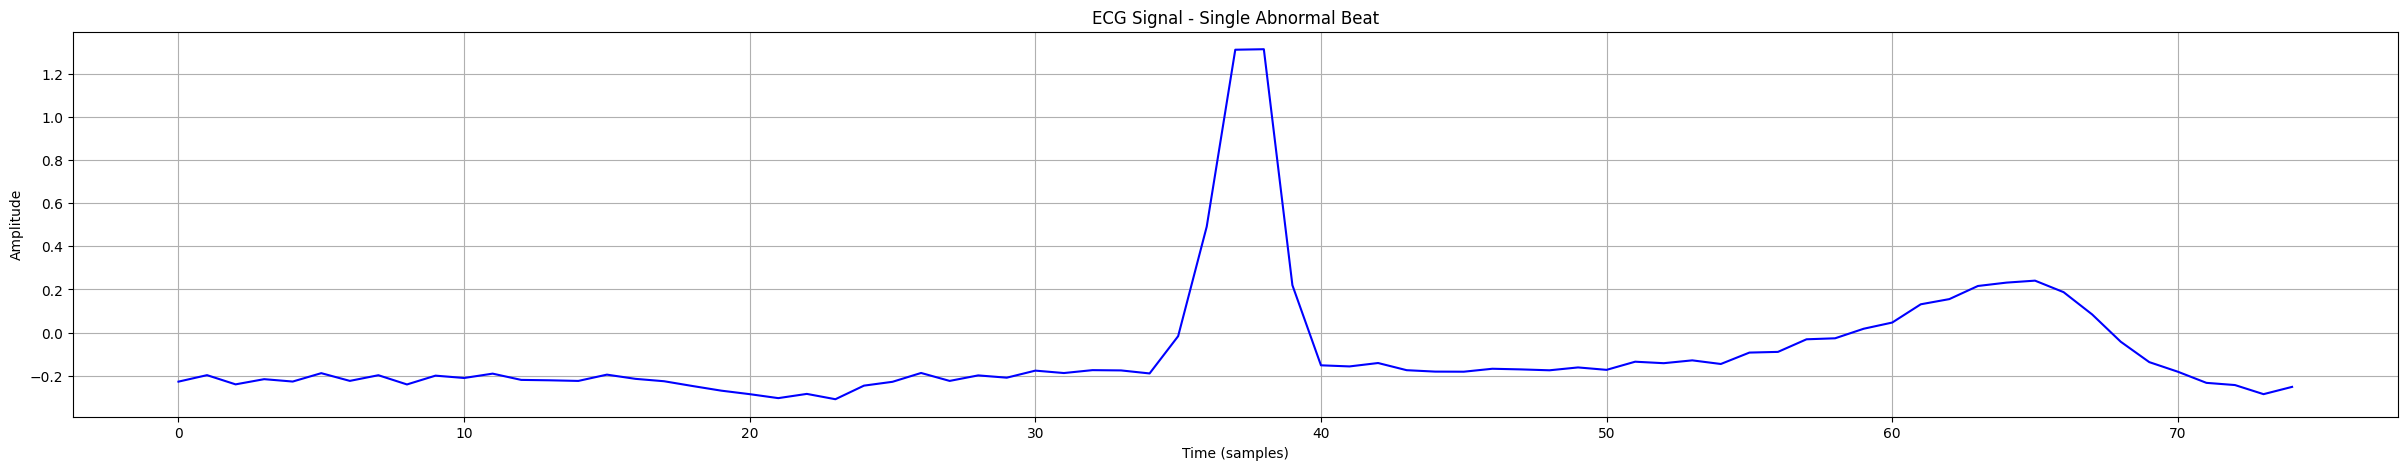

In [15]:
beat = data[data.iloc[:, -1] == 1].iloc[0, :-1].values  
beat = beat.astype(float)  

plt.figure(figsize=(30, 5))
plt.plot(beat, color='blue', linewidth=1.5)
plt.title('ECG Signal - Single Abnormal Beat')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.savefig('Abnormal_beat_plot.png')
plt.show()


# **CNN Model Training**

In [16]:
print(f"The Shape of the data: {data.shape}")

The Shape of the data: (112532, 76)


## Visualizing Class Distribution in the ECG Dataset
This cell generates a **pie chart** to visualize the proportion of **normal vs. abnormal ECG beats** in the dataset.

### Steps Involved:
    1. Counting Instances of Each Class

        * data.iloc[:, -1].value_counts() retrieves the count of normal (0) and abnormal (1) beats from the last column of the dataset.
        * The result is stored in per_classes.
    2. Creating the Pie Chart

    * A figure of size (20,10) is created for better visibility.
    * The plt.pie() function is used to generate the chart:
        * Labels: ['Normal', 'Abnormal'] to distinguish between classes.
        * Colors: tab:blue for normal and tab:orange for abnormal beats.
        * Percentage Display: autopct='%1.1f%%' shows the percentage of each class in the dataset.
3. Displaying the Chart

    * plt.show() renders the pie chart.
### Purpose of This Visualization
    * Helps in understanding class imbalance in the dataset.
    * Provides insight into the distribution of normal vs. abnormal heartbeats, which is crucial for model performance and bias mitigation.

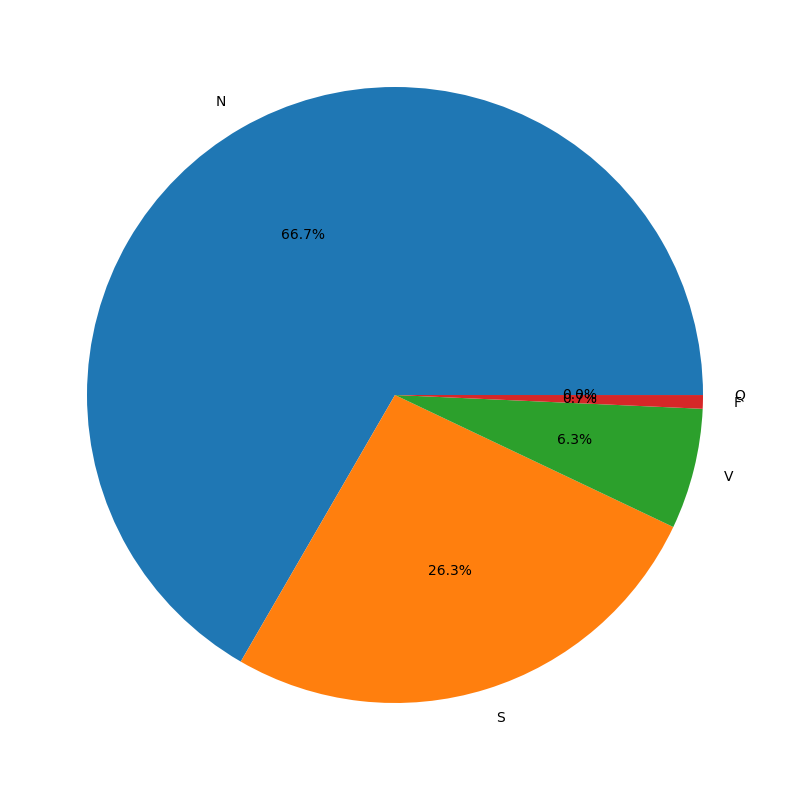

In [17]:
per_classes = data.iloc[:, -1].value_counts()
plt.figure(figsize=(20,10))
plt.pie(per_classes, labels=['N', 'S', 'V', 'F', 'Q'], autopct='%1.1f%%')
plt.show()

In [18]:
data = data[data.iloc[:, -1] != 1]
data.iloc[:, -1].value_counts()

75
0    75005
4    29594
2     7129
3      802
Name: count, dtype: int64

In [19]:
X = data.iloc[:, :-1]
X.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-0.35911538024258877,-0.2903786204332479,-0.3235733598985074,-0.30721786700984627,-0.3166447222092403,-0.32163697729774454,-0.3060665559763355,-0.3025992425509998,-0.29850192409518883,-0.29965905000702686,...,-0.4199271835302824,-0.4140518421452742,-0.43184737104296,-0.42529645313341974,-0.4502391038929214,-0.44188527823681517,-0.46139015796348526,-0.45503869957521725,-0.46450236640111797,-0.45894928801828405
1,-0.33159005201620695,-0.35915129908132676,-0.3427193114111601,-0.347785456860998,-0.3296094445027253,-0.3485099141395304,-0.3376696862022902,-0.34932634929774764,-0.34056383184892774,-0.33845006166045705,...,-0.3937719106448711,-0.4102524695287548,-0.41172384793553984,-0.4231270883876285,-0.4147749022885177,-0.43443828243288607,-0.4162977551052533,-0.4262132806445661,-0.3988064338505317,-0.3747221898111922
2,-0.3596935821417594,-0.36285849101926165,-0.35601219242087645,-0.353828777951019,-0.3492710535714224,-0.35879707260530647,-0.36390313778474753,-0.36712253604991446,-0.35674189358235625,-0.3619787734082352,...,-0.38096965987573683,-0.3745933773098115,-0.3875174304201594,-0.3734830747955423,-0.3847803526473663,-0.36635053637419135,-0.3949238282815594,-0.36635524062294295,-0.36943749766214684,-0.3121596407616159
3,-0.3399810340653625,-0.3526477370395955,-0.3511859072939032,-0.35017091542662965,-0.33906944113982057,-0.36064727722856105,-0.3547354434501923,-0.34947998991525436,-0.33529009561373446,-0.3370531001138716,...,-0.4004244847452387,-0.4244962655472517,-0.4301420612465175,-0.44710827873955056,-0.45251481542999544,-0.45250956037258727,-0.425351878024515,-0.4513674132229852,-0.41489966340466267,-0.4209234494557653
4,-0.3663167270125467,-0.3323091931906461,-0.33561089001957567,-0.32193201931728943,-0.32944704829527227,-0.3308040093297393,-0.3366297248977422,-0.3323477140551532,-0.33261758384779977,-0.3415889164470717,...,-0.40722180138088715,-0.39347622348269307,-0.42385676612604817,-0.40987354350019833,-0.4404408562099744,-0.4309774065376857,-0.4459936752478342,-0.43636271334992255,-0.4455390307034217,-0.42434810225359476


In [20]:
y = data.iloc[:, -1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: 75, dtype: object

In [21]:
print(f"The Shape of the X: {X.shape}")
print(f"The Shape of the y: {y.shape}")

The Shape of the X: (112530, 75)
The Shape of the y: (112530,)


In [22]:
# count of the classes
y.value_counts().reset_index()

,75,count
0,0,75005
1,4,29594
2,2,7129
3,3,802


In [23]:
# First, split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, split the train set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

In [24]:
print(f"The shape of X_train: {X_train.shape}")
print(f"The shape of X_test: {X_test.shape}")
print(f"The shape of X_valid: {X_valid.shape}")
print(f"The length of y_train: {len(y_train)}")
print(f"The length of y_test: {len(y_test)}")
print(f"The shape of y_valid: {len(y_valid)}")

The shape of X_train: (67518, 75)
The shape of X_test: (22506, 75)
The shape of X_valid: (22506, 75)
The length of y_train: 67518
The length of y_test: 22506
The shape of y_valid: 22506


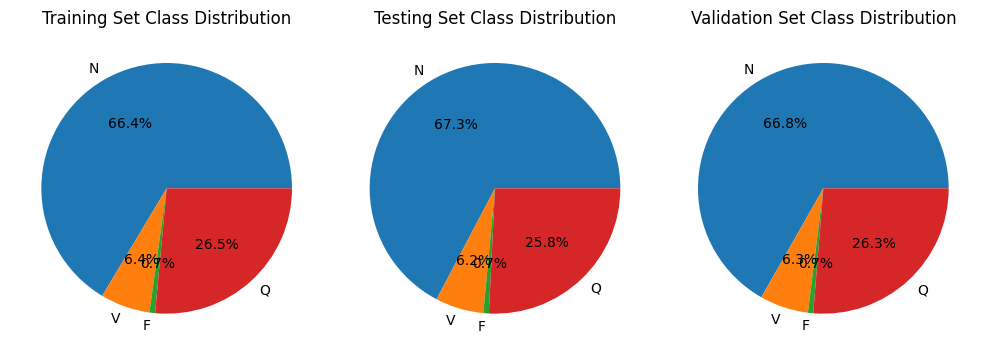

In [25]:
# Compute class distributions for training and testing sets
train_classes, train_counts = np.unique(y_train, return_counts=True)
test_classes, test_counts = np.unique(y_test, return_counts=True)
valid_classes, valid_counts = np.unique(y_valid, return_counts=True)

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 3, figsize=(10, 8))

# Plot the Training Set Distribution
axes[0].pie(train_counts, labels=['N', 'V', 'F', 'Q'], autopct='%1.1f%%')
axes[0].set_title('Training Set Class Distribution')

# Plot the Testing Set Distribution
axes[1].pie(test_counts, labels=['N', 'V', 'F', 'Q'], autopct='%1.1f%%')
axes[1].set_title('Testing Set Class Distribution')

# Plot the Testing Set Distribution
axes[2].pie(valid_counts, labels=['N', 'V', 'F', 'Q'], autopct='%1.1f%%')
axes[2].set_title('Validation Set Class Distribution')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [26]:
X_train = X_train.values
train_x = X_train.reshape(len(X_train), X_train.shape[1],1)
print(np.shape(train_x))
# print(train_x[0])
print(type(train_x))
# X_train = np.array(X_train)

X_test = X_test.values
test_x = X_test.reshape(len(X_test), X_test.shape[1],1)
print(np.shape(test_x))
# print(train_x[0])
print(type(test_x))

X_valid = X_valid.values
valid_x = X_valid.reshape(len(X_valid), X_valid.shape[1],1)
print(np.shape(valid_x))
# print(train_x[0])
print(type(valid_x))
# X_test = np.array(X_test)

# print(type(y_train))

(67518, 75, 1)
<class 'numpy.ndarray'>
(22506, 75, 1)
<class 'numpy.ndarray'>
(22506, 75, 1)
<class 'numpy.ndarray'>


In [27]:
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(67518,)
(22506,)
(22506,)


In [28]:
train_y=to_categorical(y_train)
test_y=to_categorical(y_test)
valid_y=to_categorical(y_valid)
print(np.shape(train_y), np.shape(test_y), np.shape(valid_y))

(67518, 5) (22506, 5) (22506, 5)


In [29]:
train_x = np.array(train_x, dtype=np.float32)
train_y = np.array(train_y, dtype=np.float32)

test_x = np.array(test_x, dtype=np.float32)
test_y = np.array(test_y, dtype=np.float32)

valid_x = np.array(valid_x, dtype=np.float32)
valid_y = np.array(valid_y, dtype=np.float32)

### Model Architecture Definition
This section defines a **1D Convolutional Neural Network (CNN)** for ECG classification.
The model consists of:

1. **Four Convolutional Layers** with increasing filters (16 → 32 → 64 → 128) to extract ECG signal features.
2. **Max Pooling Layers** to reduce spatial dimensions and computational complexity.
3. **Flattening Layer** to convert feature maps into a single vector.
4. **Fully Connected Layers** with **Dropout (0.5, 0.4, 0.3)** to prevent overfitting.
5. **Output Layer** with a **sigmoid activation** for binary classification (Normal vs. Abnormal ECG).

In [30]:
# Function to build the CNN model for ECG classification
model = Sequential()

# First Convolutional Layer with 16 filters, kernel size 11, ReLU activation, and same padding
model.add(Conv1D(filters=16, kernel_size=11, strides=1, padding='same', activation='relu', input_shape=(75, 1)))
model.add(MaxPooling1D(pool_size=5, strides=2))  # Max pooling to reduce dimensionality

# Second Convolutional Layer with 32 filters
model.add(Conv1D(filters=32, kernel_size=13, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))  

# Third Convolutional Layer with 64 filters
model.add(Conv1D(filters=64, kernel_size=15, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))  

# Fourth Convolutional Layer with 128 filters
model.add(Conv1D(filters=128, kernel_size=17, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides=2))  

# Flattening the feature maps into a single vector
model.add(Flatten())

# Fully connected layers with Dropout for regularization
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))

# Output layer with sigmoid activation for binary classification
model.add(Dense(5, activation='softmax'))

# Display model architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 75, 16)              │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 36, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 36, 32)              │           6,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 16, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 16, 64)              │          30,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 6, 128)              │         139,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             255 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 195,261 (762.74 KB)

 Trainable params: 195,261 (762.74 KB)

 Non-trainable params: 0 (0.00 B)

### Model Compilation
This section **compiles** the CNN model with:  
- **Loss Function:** `binary_crossentropy` (since it's a binary classification task).  
- **Optimizer:** `Adam` with a learning rate of `0.0001` for efficient learning.  
- **Metric:** `accuracy`, which evaluates how well the model is performing.  

In [31]:
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(
    loss='categorical_crossentropy',  # Suitable for binary classification
    optimizer=Adam(learning_rate=0.0001),  # Adam optimizer with a learning rate of 0.0001
    metrics=['accuracy']  # Track accuracy during training
)

### Early Stopping Mechanism
To **prevent overfitting**, `EarlyStopping` is used:  
- **Monitors Validation Loss** (`val_loss`) to track generalization.  
- **Stops Training if No Improvement in 5 Consecutive Epochs** (`patience=5`).  
- **Restores Best Weights** (`restore_best_weights=True`) to keep the most optimal model.  

In [32]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,  # Stop training if validation loss doesn't improve for 5 epochs
    restore_best_weights=True  # Restore best model weights after stopping
)

### Saving the Best Model in HDF5 Format

1. **Using ModelCheckpoint Callback**
   - Saves the best model based on **validation loss** (`val_loss`).
   - Ensures only the best-performing model (lowest `val_loss`) is saved.
   - The model is saved in **HDF5 format (`.h5`)**, which supports model architecture, weights, and optimizer state.

2. **Parameters in `ModelCheckpoint`**
   - `filepath='best_ecg_model.h5'` → Saves the model with this filename.
   - `monitor='val_loss'` → Tracks validation loss for saving.
   - `save_best_only=True` → Saves only the best model, preventing storage of unnecessary models.
   - `mode='min'` → Saves the model when `val_loss` decreases.

In [33]:
# Define a ModelCheckpoint to save the best model
checkpoint = ModelCheckpoint(
    filepath='best_ecg_model.keras',  # Change the extension to .keras
    monitor='val_loss',              # Monitor validation loss
    save_best_only=True,             # Save only the best model based on val_loss
    mode='min',                      # Save model when val_loss is minimized
    verbose=1                        # Print a message when saving the model
)


### Model Training Process
The model is trained on `X_train` and `y_train` using:  
- **Batch Size:** `42` (controls how many samples are processed before updating weights).  
- **Epochs:** `50` (maximum training cycles).  
- **Validation Data:** `(X_test, y_test)` for tracking model performance on unseen data.  
- **Early Stopping Callback:** Helps prevent unnecessary training when validation loss stops improving.  

In [34]:
# Train the model
history = model.fit(
    train_x, train_y,
    batch_size=42,  # Number of samples per batch
    epochs=50,  # Train for up to 50 epochs
    verbose=1,  # Show training progress
    validation_data=(valid_x, valid_y),  # Validate on test data
    callbacks=[early_stopping, checkpoint]  # Apply early stopping and checkpoint
)

Epoch 1/50
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7112 - loss: 0.7975
Epoch 1: val_loss improved from inf to 0.25109, saving model to best_ecg_model.keras
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.7113 - loss: 0.7974 - val_accuracy: 0.9268 - val_loss: 0.2511
Epoch 2/50
1604/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9258 - loss: 0.2695
Epoch 2: val_loss improved from 0.25109 to 0.14784, saving model to best_ecg_model.keras
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9258 - loss: 0.2694 - val_accuracy: 0.9582 - val_loss: 0.1478
Epoch 3/50
1593/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9573 - loss: 0.1710
Epoch 3: val_loss improved from 0.14784 to 0.11348, saving model to best_ecg_model.keras
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9573 - loss: 0.1709 - val_accuracy: 0.9675 - val_loss: 0.1135
Epoch 4/50
1604/1608 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9646 - loss: 0.1393
Epoch 4: val_loss improve

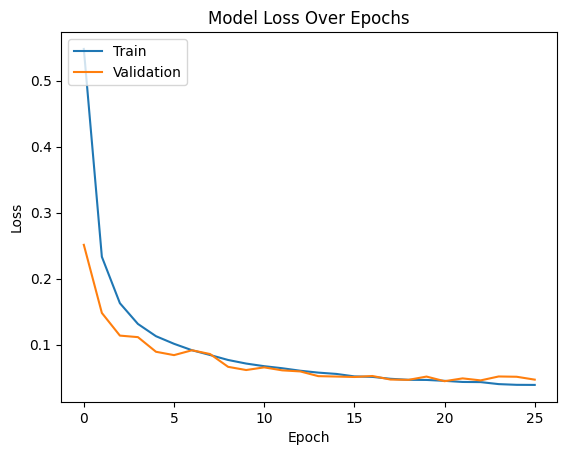

In [35]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss

# Set the title and axis labels
plt.title('Model Loss Over Epochs')  # Title of the plot
plt.ylabel('Loss')  # Y-axis label (Loss)
plt.xlabel('Epoch')  # X-axis label (Epoch count)

# Add a legend to differentiate between training and validation loss
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss_plot.png')

# Display the plot
plt.show()

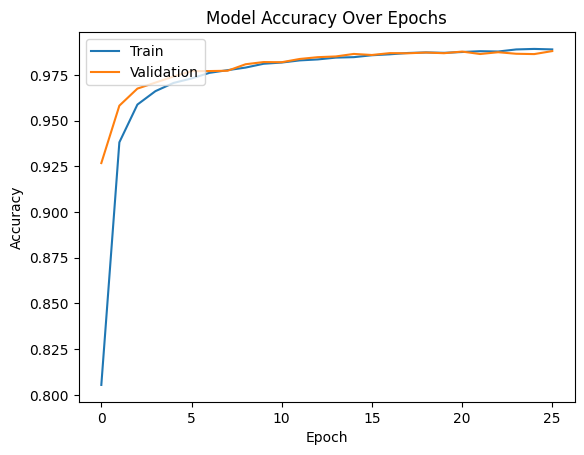

In [36]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy

# Set the title and axis labels
plt.title('Model Accuracy Over Epochs')  # Title of the plot
plt.ylabel('Accuracy')  # Y-axis label (Accuracy)
plt.xlabel('Epoch')  # X-axis label (Epoch count)

# Add a legend to differentiate between training and validation accuracy
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy_plot.png')

# Display the plot
plt.show()

In [37]:
model.predict(test_x)

704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[1.21236462e-06, 7.87593797e-25, 1.24593589e-06, 1.39265847e-11,
        9.99997497e-01],
       [9.87734973e-01, 1.51133064e-11, 1.02430567e-04, 5.34219085e-04,
        1.16283605e-02],
       [9.95399535e-01, 3.68259229e-14, 1.02563090e-05, 7.52953638e-05,
        4.51492006e-03],
       ...,
       [9.98739183e-01, 1.38230779e-15, 4.25227563e-06, 5.26675612e-05,
        1.20396505e-03],
       [2.42917496e-03, 2.70995639e-12, 1.48965453e-03, 8.34808361e-06,
        9.96072888e-01],
       [9.99958754e-01, 2.89021848e-25, 5.13126652e-10, 4.02325888e-08,
        4.12913905e-05]], dtype=float32)

In [38]:
# Evaluate the trained model on the test dataset
score = model.evaluate(test_x, test_y)

# Print the test loss
print(f'Test Loss: {score[0]:.4f}')  # Display test loss with 4 decimal precision

# Print the test accuracy
print(f'Test Accuracy: {score[1] * 100:.2f}%')

704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9867 - loss: 0.0412
Test Loss: 0.0442
Test Accuracy: 98.68%


704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


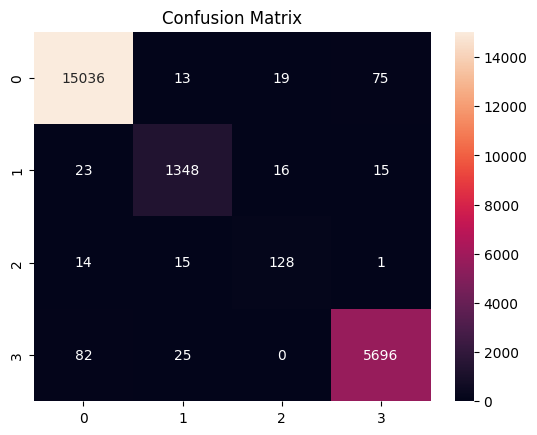

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true=[]
for element in test_y:
    y_true.append(np.argmax(element))
prediction_proba=model.predict(test_x)
prediction=np.argmax(prediction_proba,axis=1)
ax=plt.subplot()
custCnnConfMat = confusion_matrix(y_true, prediction)
sns.heatmap(custCnnConfMat, annot=True,fmt='d',ax=ax)
ax.set_title('Confusion Matrix'); 
plt.savefig('cm')

In [40]:
from sklearn.metrics import classification_report

cf = classification_report(y_true, prediction,digits=4)
print(cf)

              precision    recall  f1-score   support

           0     0.9921    0.9929    0.9925     15143
           2     0.9622    0.9615    0.9618      1402
           3     0.7853    0.8101    0.7975       158
           4     0.9843    0.9816    0.9829      5803

    accuracy                         0.9868     22506
   macro avg     0.9310    0.9365    0.9337     22506
weighted avg     0.9868    0.9868    0.9868     22506

